In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
import math
import datetime
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import exp, fabs, sqrt, log, pi
import random

In [4]:
rnd=57
random.seed(rnd)

In [16]:
X, y = readAggrData()
# del X['recency']
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

In [6]:
def pltBars(values, labels):
    fig = plt.figure(figsize=(20,5))
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), labels)

## Random Forest Regression

In [17]:
model = RandomForestRegressor()

In [18]:
param_grid = {
    'max_features': [6,7,8,9,10,11,12],
    'n_estimators': [10,20,50],
    'max_depth': [5,6,7,8],
    'min_samples_leaf': range(1,20)
}

In [19]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, verbose=2, n_jobs=6)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=10)

In [20]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   41.3s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=6,
          param_distributions={'max_features': [6, 7, 8, 9, 10, 11, 12], 'n_estimators': [10, 20, 50], 'max_depth': [5, 6, 7, 8], 'min_samples_leaf': range(1, 20)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [21]:
grid.best_params_

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 12, 'n_estimators': 50}

In [18]:
# rf = RandomForestRegressor(**grid.best_params_)
rf = RandomForestRegressor(max_depth=6,max_features=10,min_samples_leaf=18,n_estimators=50)
# rf = RandomForestRegressor(**params)

In [19]:
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=18, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

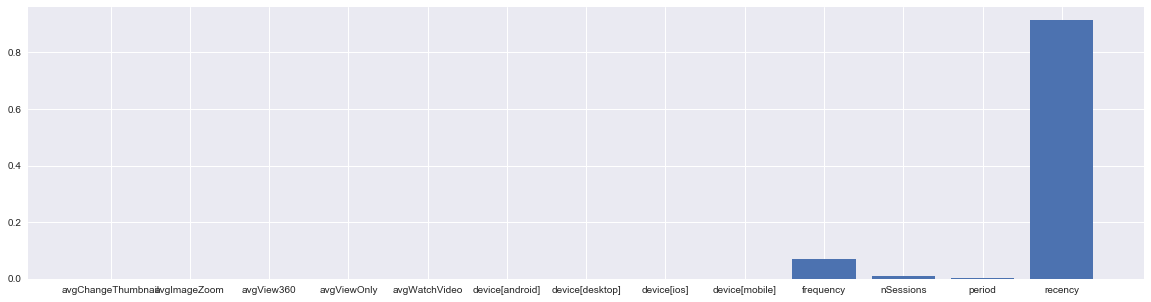

In [20]:
pltBars(rf.feature_importances_, X.columns)

In [23]:
y_pred = rf.predict(X_test)

In [21]:
rmse = sqrt(mean_squared_error(y_test, rf.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'35 days, 7:21:52.781727'

In [22]:
rmse

3050512.781727185

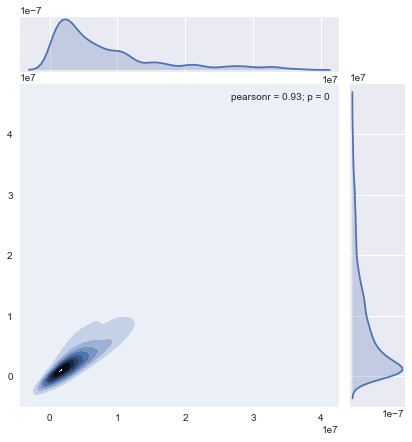

In [26]:
sns.jointplot(y_pred, y_test, kind="kde")

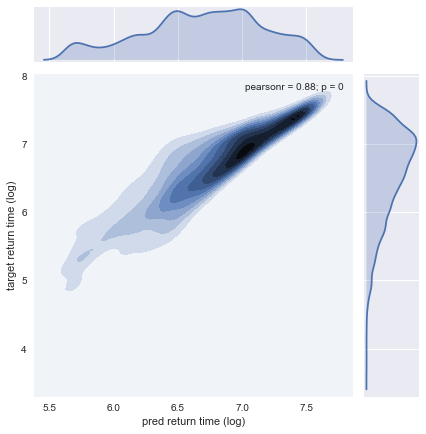

In [27]:
grid = sns.jointplot(np.log10(y_pred), np.log10(y_test), kind="kde")
grid.set_axis_labels("pred return time (log)", "target return time (log)")